## Campos involucrados

- garage
- gimnasio
- pisccina
- usosmultiples

## Ideas



In [1]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"

In [3]:
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)

In [4]:
df['tiene_amenities'] = (df["gimnasio"] + df["usosmultiples"] + df["piscina"]) > 0
df['tiene_cercanias'] = (df["centroscomercialescercanos"] + df["escuelascercanas"]) > 0
df.columns

/home/andre/.local/share/virtualenvs/7506-TP-WtW0mOt4/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia',
       'precio_metro_cubierto', 'precio_metro_total', 'gps', 'tiene_amenities',
       'tiene_cercanias'],
      dtype='object')

In [5]:
ameneties=df.groupby(["tiene_amenities"]).agg({"id":"count"})
ameneties=ameneties.rename(columns={"id":"cantidad"})

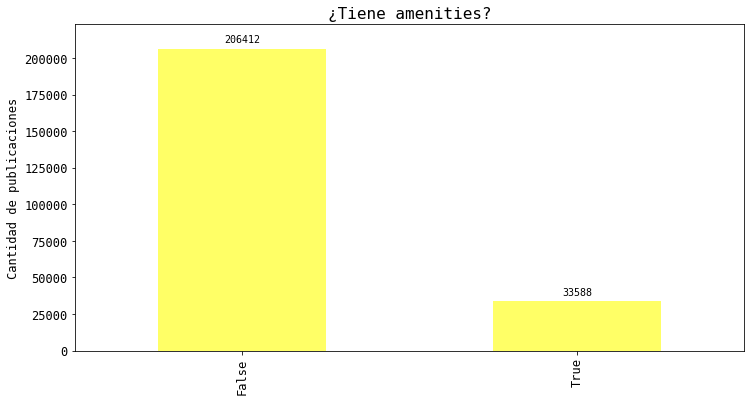

In [6]:
get_barplot(ameneties["cantidad"], title="¿Tiene amenities?", y_label="Cantidad de publicaciones")

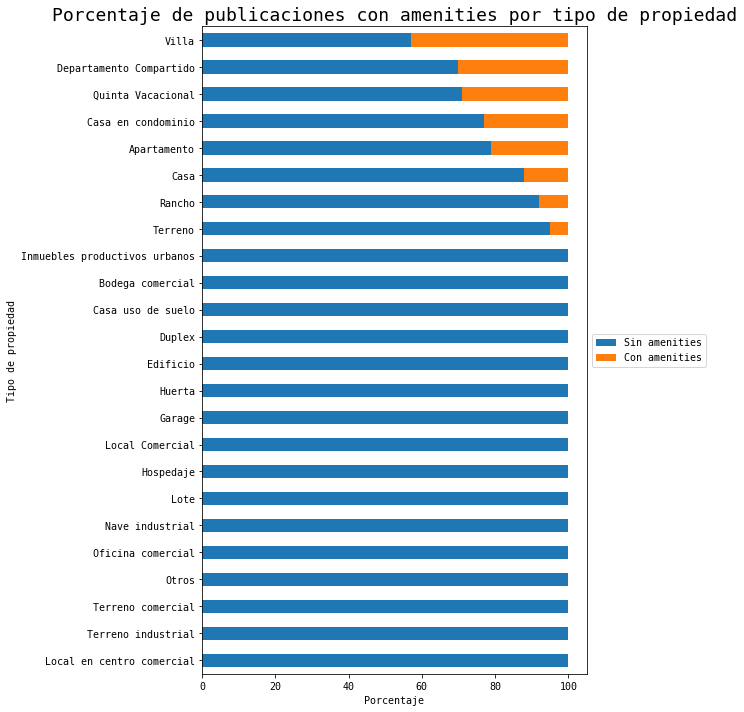

In [7]:
amenities_por_tipo = df.groupby(["tipodepropiedad","tiene_amenities"]).agg({"id":"count"}).unstack(fill_value=0)
amenities_por_tipo.columns = ["No", "Sí"]
amenities_por_tipo = (amenities_por_tipo.div(amenities_por_tipo.sum(axis=1), axis=0) * 100).apply(lambda x: round(x,0)).sort_values(by="Sí", ascending=True)
plot = amenities_por_tipo.plot(kind = 'barh', stacked=True, figsize=(10,10))
plot.legend(labels=["Sin amenities", "Con amenities"],loc='center left', bbox_to_anchor=(1, 0.5))
plot.set_title("Porcentaje de publicaciones con amenities por tipo de propiedad", fontdict={"fontsize": 18})
plot.set_xlabel("Porcentaje")
plot.set_ylabel("Tipo de propiedad")
plt.tight_layout()

In [8]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia',
       'precio_metro_cubierto', 'precio_metro_total', 'gps', 'tiene_amenities',
       'tiene_cercanias'],
      dtype='object')

In [16]:
tipos_con_amenities = amenities_por_tipo.loc[amenities_por_tipo["No"] < 100].index.values
tipos_con_cercanias = cercanias_por_tipo.loc[cercanias_por_tipo["No"] < 100].index.values

Text(0.5, 1.0, 'Precio de las publicaciones con y sin amenities por tipo de propiedad')

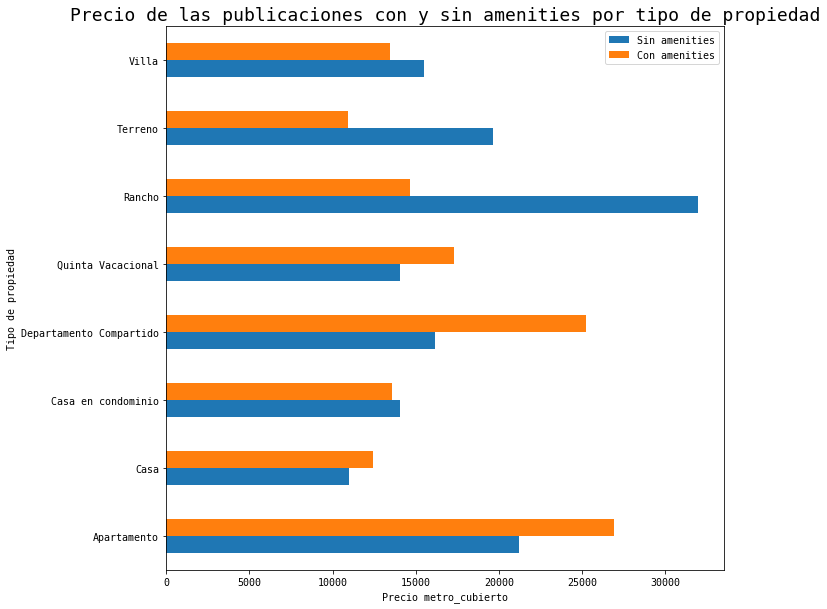

In [10]:
precio_amenities_por_tipo = df.loc[df["tipodepropiedad"].isin(tipos_con_amenities)].groupby(["tipodepropiedad","tiene_amenities"]).agg({"precio_metro_cubierto":"mean"}).dropna().unstack()
precio_amenities_por_tipo.columns = ["Sin amenities", "Con amenities"]
plot = precio_amenities_por_tipo.plot(kind = 'barh', stacked=False, figsize=(10,10), title="Precio de las publicaciones con y sin amenities por tipo de propiedad")
plot.set_xlabel("Precio metro_cubierto")
plot.set_ylabel("Tipo de propiedad")
plot.set_title("Precio de las publicaciones con y sin amenities por tipo de propiedad", fontdict={"fontsize": 18})

In [11]:
cercanias = df.groupby(["tiene_cercanias"]).agg({"id":"count"})
cercanias = cercanias.rename(columns={"id":"cantidad"})

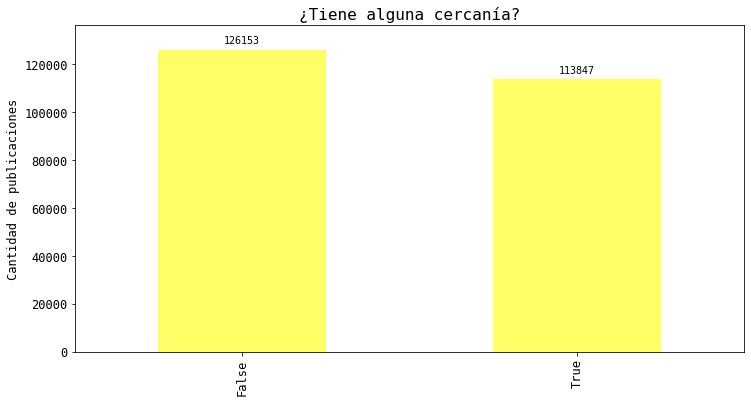

In [12]:
get_barplot(cercanias["cantidad"], title="¿Tiene alguna cercanía?", y_label="Cantidad de publicaciones")

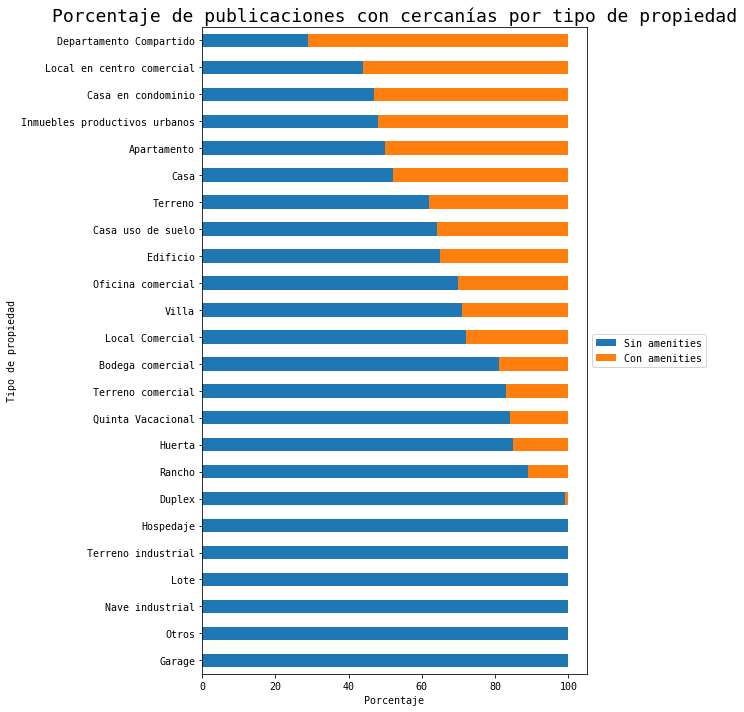

In [15]:
cercanias_por_tipo = df.groupby(["tipodepropiedad","tiene_cercanias"]).agg({"id":"count"}).unstack(fill_value=0)
cercanias_por_tipo.columns = ["No", "Sí"]
cercanias_por_tipo = (cercanias_por_tipo.div(cercanias_por_tipo.sum(axis=1), axis=0) * 100).apply(lambda x: round(x,0)).sort_values(by="Sí", ascending=True)
plot = cercanias_por_tipo.plot(kind = 'barh', stacked=True, figsize=(10,10))
plot.legend(labels=["Sin amenities", "Con amenities"],loc='center left', bbox_to_anchor=(1, 0.5))
plot.set_title("Porcentaje de publicaciones con cercanías por tipo de propiedad", fontdict={"fontsize": 18})
plot.set_xlabel("Porcentaje")
plot.set_ylabel("Tipo de propiedad")
plt.tight_layout()  

Text(0.5, 1.0, 'Precio de las publicaciones con y sin cercanias por tipo de propiedad')

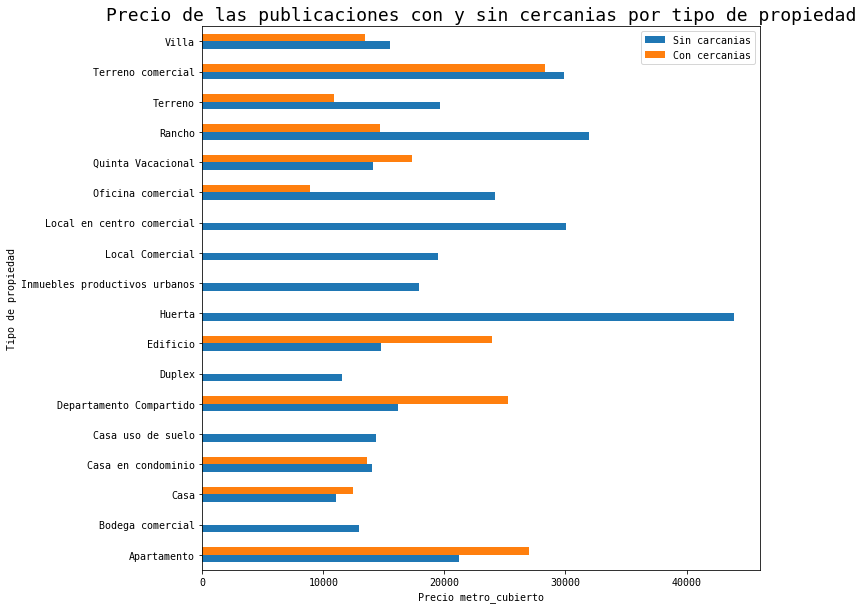

In [17]:
precio_cercanias_por_tipo = df.loc[df["tipodepropiedad"].isin(tipos_con_cercanias)].groupby(["tipodepropiedad","tiene_amenities"]).agg({"precio_metro_cubierto":"mean"}).dropna().unstack()
precio_cercanias_por_tipo.columns = ["Sin carcanias", "Con cercanias"]
plot = precio_cercanias_por_tipo.plot(kind = 'barh', stacked=False, figsize=(10,10), title="Precio de las publicaciones con y sin cercanias por tipo de propiedad")
plot.set_xlabel("Precio metro_cubierto")
plot.set_ylabel("Tipo de propiedad")
plot.set_title("Precio de las publicaciones con y sin cercanias por tipo de propiedad", fontdict={"fontsize": 18})